In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("../Datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Explorasi Data Dan Visualisasi

In [3]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.duplicated().any()

False

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


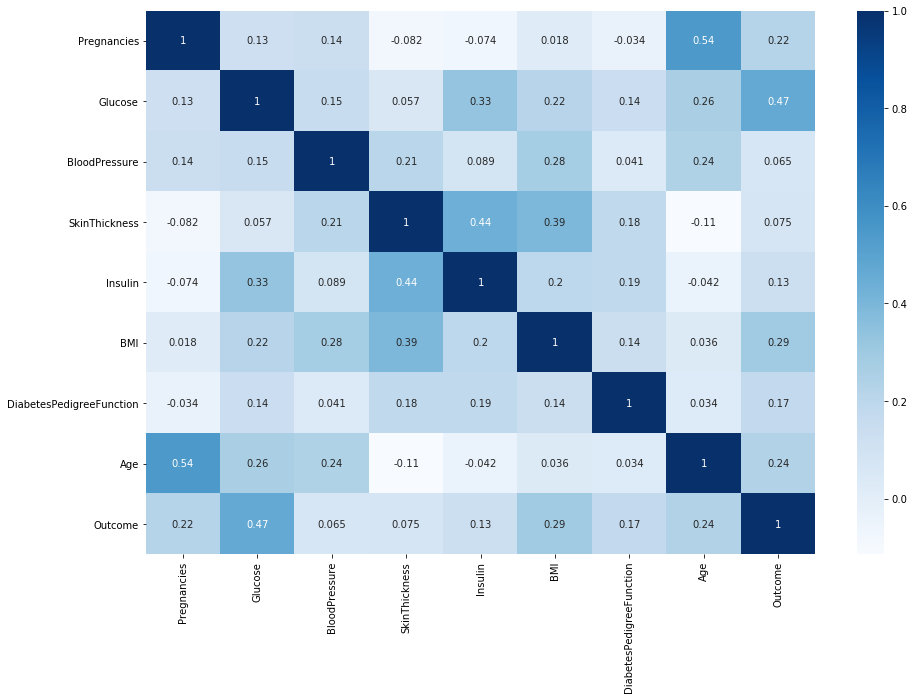

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

### Hasil:
- Glukose berkorelasi tinggi terhadap kolom target yaitu Outcome, yang artinya Glukose atau gula darah sangat mempengaruhi orang bisa terkena diabetes atau tidak, semakin tinggi Glukose atau gula darah semakin tinggi pula potensi untuk terkena diabetes
- Insulin berkorelasi terhadap Glukose, hal itu make sense karena hormon Insulin dapat mengontrol Glukose
- Pregnancies berkorelasi terhadap Age, hal itu make sense karena ada rentang usia produktif bagi wanita dan ada juga rentang usia sudah tidak peroduktif bagi wanita yang artinya ada rentang usia bagi wanita sudah tidak dapat hamil lagi 

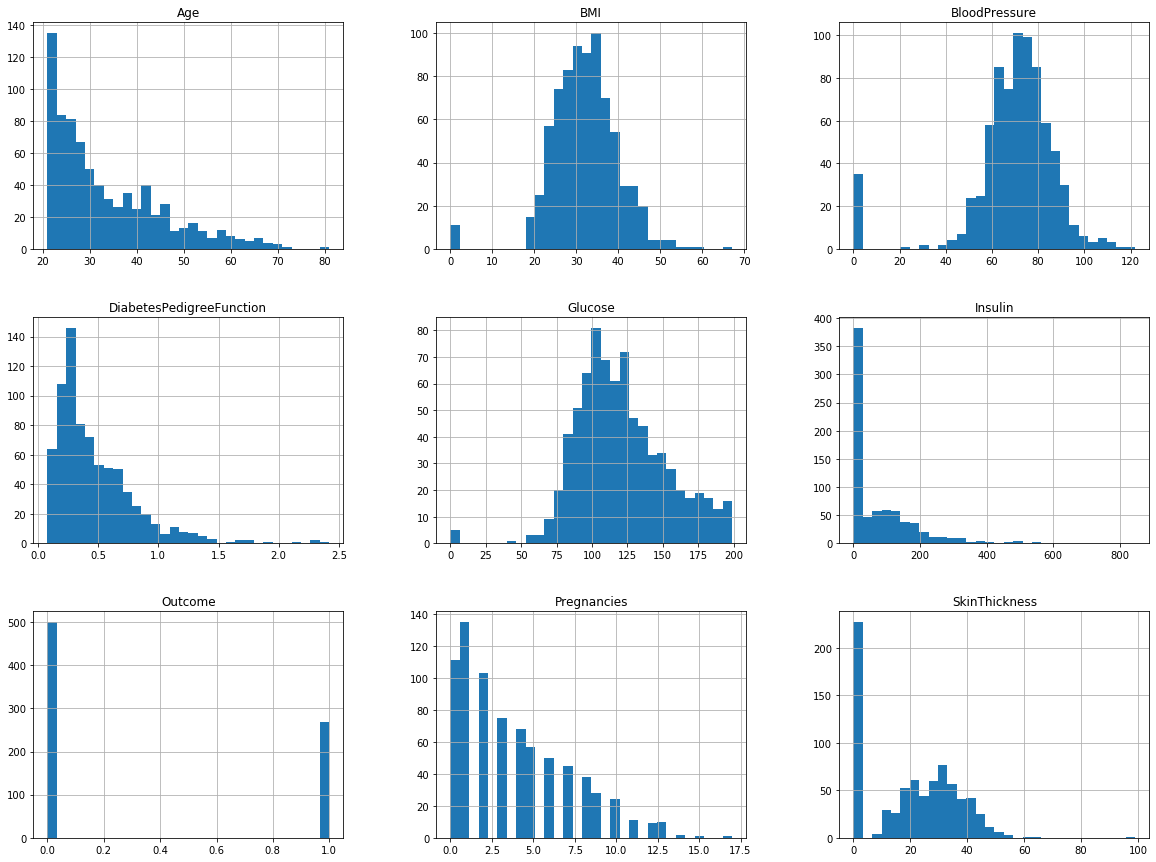

In [8]:
df.hist(figsize=(20,15), bins=30)
plt.show()

In [9]:
df[df["Insulin"] == 0].count()

Pregnancies                 374
Glucose                     374
BloodPressure               374
SkinThickness               374
Insulin                     374
BMI                         374
DiabetesPedigreeFunction    374
Age                         374
Outcome                     374
dtype: int64

In [10]:
df["BMI"] = df["BMI"].replace(0, df["BMI"].median())
df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].median())
df["Glucose"] = df["Glucose"].replace(0, df["Glucose"].median())
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].median())

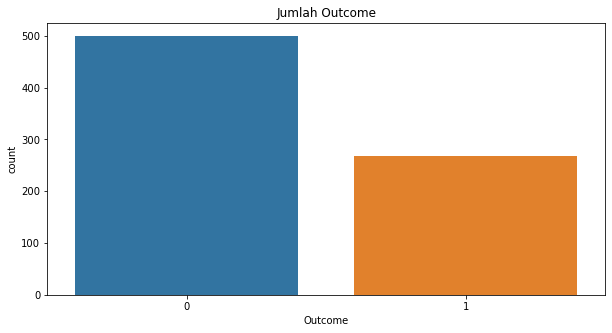

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x=df["Outcome"]).set(title='Jumlah Outcome')
plt.show()

### Data Target
0 -> Tidak Diabetes <br>
1 -> Diabetes

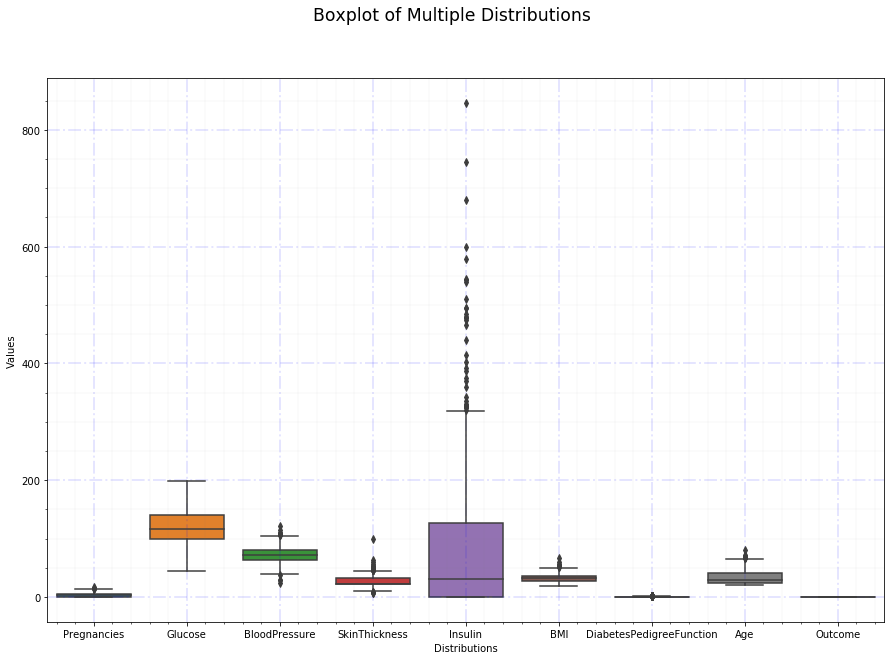

In [12]:
### Boxplot

fig = plt.figure(figsize = (15,10))
ax = plt.axes()

sns.boxplot(data=df)

plt.grid(color = 'blue', which = 'major', alpha = 0.1, linestyle = '-.', linewidth=2)
plt.minorticks_on()
plt.grid(color = 'grey', which = 'minor', alpha = 0.2, linestyle = '-', linewidth = 0.3)

ax.set_xlabel('Distributions')
ax.set_ylabel('Values')

fig.suptitle('Boxplot of Multiple Distributions', fontsize = 'xx-large')

plt.show()

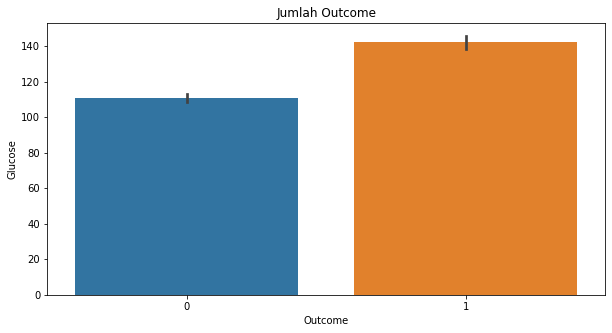

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, y="Glucose", x="Outcome").set(title='Jumlah Outcome')
plt.show()

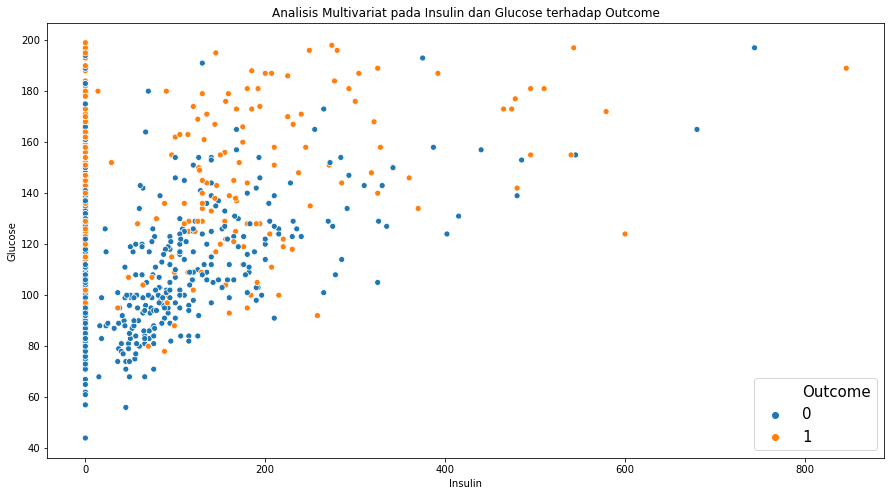

In [14]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = df, x = df['Insulin'], y = 'Glucose', hue='Outcome')
plt.title("Analisis Multivariat pada Insulin dan Glucose terhadap Outcome")
plt.legend(fontsize=15)
plt.show() 

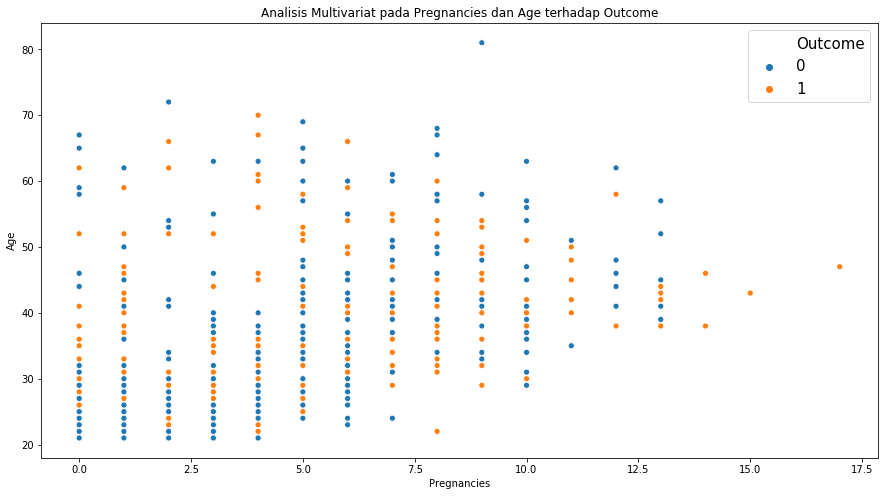

In [15]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = df, x = df['Pregnancies'], y = 'Age', hue='Outcome')
plt.title("Analisis Multivariat pada Pregnancies dan Age terhadap Outcome")
plt.legend(fontsize=15)
plt.show() 

# Modelling

## Train Test Split

In [16]:
X = df.drop(columns=["Outcome"])
y = df.Outcome

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Normalisasi

In [19]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model

In [22]:
MODEL,MODEL2 = [],[]
TEST,TEST2 = [],[]

def eval(model,test1, test2):
    MODEL.append(model)
    TEST.append(round(test1,2))
    TEST2.append(round(test2,2))

### Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC

In [25]:
svm = SVC(max_iter=500)
model_svm = svm.fit(X_train, y_train)
svm_score_train = model_svm.score(X_train, y_train)
svm_score_test = model_svm.score(X_test, y_test)

print(svm_score_train)
print(svm_score_test)

0.8324022346368715
0.7489177489177489


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
svm_pred = model_svm.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.59      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.75       231



### K-Nearest Neighbors (KNN)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
model_knn = knn.fit(X_train, y_train)
knn_score_train = model_knn.score(X_train, y_train)
knn_score_test = model_knn.score(X_test, y_test)

print(knn_score_train)
print(knn_score_test)

0.839851024208566
0.7056277056277056


In [30]:
knn_pred = model_knn.predict(X_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       151
           1       0.58      0.55      0.56        80

    accuracy                           0.71       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



### Logistic Regressor

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()
model_lr = lr.fit(X_train,y_train)
lr_score_train = model_lr.score(X_train, y_train)
lr_score_test = model_lr.score(X_test, y_test)

print(lr_score_train)
print(lr_score_test)

0.7839851024208566
0.7489177489177489


In [33]:
lr_pred = model_lr.predict(X_test)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.59      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.75       231



## Hyperparameter Tunnning

### Support Vector Machine (SVM)

In [34]:
svm_parameters = {
    "C" : [0.5,1,10,100],
    "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma": ['scale', 100, 10, 1, 0.5]
}

grid_svm = GridSearchCV(svm, svm_parameters, cv=3, verbose=1, n_jobs=-1)
grid_svm.fit(X_train, y_train)
grid_svm_score_train = grid_svm.score(X_train, y_train)
grid_svm_score_test = grid_svm.score(X_test, y_test)
eval("Support Vector Machine",svm_score_test, grid_svm_score_test)

print(grid_svm_score_train)
print(grid_svm_score_test)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    4.6s


0.7746741154562383
0.7445887445887446


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.4s finished
C:\Users\ASUS\Miniconda3\envs\jcopml\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [35]:
grid_svm_pred = grid_svm.predict(X_test)
print(classification_report(y_test, grid_svm_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



### K-Nearest Neighbors (KNN)

In [36]:
knn_parameters = {
    "n_neighbors" : range(1,51,2),
    "p" : [1,2],
    "weights": ['distance','uniform']
}

grid_knn = GridSearchCV(knn, knn_parameters, cv=3, verbose=1, n_jobs=-1)
grid_knn.fit(X_train, y_train)
grid_knn_score_train = grid_knn.score(X_train, y_train)
grid_knn_score_test = grid_knn.score(X_test, y_test)
eval("K-Nearest Neighbors",knn_score_test, grid_knn_score_test)

print(grid_knn_score_train)
print(grid_knn_score_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s


0.8175046554934823
0.7272727272727273


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.1s finished


In [37]:
grid_knn_pred = grid_knn.predict(X_test)
print(classification_report(y_test, grid_knn_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       151
           1       0.62      0.54      0.58        80

    accuracy                           0.73       231
   macro avg       0.70      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



### Logistic Regressor

In [38]:
lr_parameters = {
    "fit_intercept" : [True, False],
    "C" : [0.5,1,10,100]
}

grid_lr = GridSearchCV(lr, lr_parameters, cv=3, verbose=1, n_jobs=-1)
grid_lr.fit(X_train, y_train)
grid_lr_score_train = grid_lr.score(X_train, y_train)
grid_lr_score_test = grid_lr.score(X_test, y_test)
eval("Logistic Regressor",lr_score_test, grid_lr_score_test)

print(grid_lr_score_train)
print(grid_lr_score_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
0.7839851024208566
0.7489177489177489

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.1s finished


In [39]:
grid_lr_pred = grid_lr.predict(X_test)
print(classification_report(y_test, grid_lr_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.59      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.75       231



# Kesimpulan

In [41]:
print("\t\t\tTest Accuracy")
results2 = pd.DataFrame({ 'Model': MODEL,
                         'Original': TEST,
                         'Hyperparameter Tunning': TEST2 })

results2.sort_values(by='Original',ascending=False)

			Test Accuracy


,Model,Original,Hyperparameter Tunning
0,Support Vector Machine,0.75,0.74
2,Logistic Regressor,0.75,0.75
1,K-Nearest Neighbors,0.71,0.73
